<a href="https://colab.research.google.com/github/sichan0107/Data_Analysis/blob/master/ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2019.csv to 2019 (1).csv
Saving climate_2019.csv to climate_2019.csv


In [3]:
# 데이터 불러오기 
import io
import pandas as pd

# 2019년도 오존, 녹스, 복스 불러오기
df_vocs_2019 = pd.read_csv(io.StringIO(uploaded['2019.csv'].decode('utf-8')))

#df_climate_2020 = pd.read_csv(io.StringIO(uploaded['climate_2019.csv'].decode('utf-8')))

In [4]:
# 불러온 데이터 확인해보기
print(df_vocs_2019)

       O3    Nox   VOCs
0   0.014  0.075  29.09
1   0.013  0.072  15.22
2   0.012  0.081  65.23
3   0.032  0.055  28.18
4   0.029  0.059  62.95
5   0.027  0.071  36.59
6   0.031  0.076  32.50
7   0.048  0.085  16.14
8   0.041  0.078  11.14
9   0.044  0.074  23.86
10  0.049  0.083  15.45
11  0.035  0.068  10.91
12  0.032  0.075  27.95
13  0.032  0.083  17.95
14  0.031  0.085  32.95
15  0.027  0.069  15.68
16  0.026  0.025  32.72
17  0.028  0.029  38.41
18  0.028  0.028  42.04
19  0.027  0.022  47.04
20  0.028  0.017  30.00
21  0.013  0.064  22.50
22  0.011  0.060  52.27
23  0.013  0.057  45.22
    temp  rain   wa   wd  hume  sun
0   -5.9   NaN  1.8  270    56  NaN
1   -6.5   NaN  1.2  290    60  NaN
2   -6.9   NaN  2.2  270    62  NaN
3   -7.0   NaN  0.9  290    50  0.0
4   -4.9   NaN  1.6  290    44  0.6
5   -1.8   NaN  2.2  290    48  1.0
6    1.5   NaN  1.0  230    74  NaN
7    1.4   NaN  1.2  270    75  NaN
8    4.1   NaN  2.7  270    62  1.0
9    4.8   NaN  3.9  290    40  1.0
10  

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

#  x라는 변수에  녹스 복스 데이터 넣기
x = df_vocs_2019[['Nox', 'VOCs']]

# y라는 변수에 오존데이터 넣기
y = df_vocs_2019[['O3']]

# 나눈 데이터 확인해보기
print(x)
print('============================')
print(y)
print('============================')


     VOCs
0   29.09
1   15.22
2   65.23
3   28.18
4   62.95
5   36.59
6   32.50
7   16.14
8   11.14
9   23.86
10  15.45
11  10.91
12  27.95
13  17.95
14  32.95
15  15.68
16  32.72
17  38.41
18  42.04
19  47.04
20  30.00
21  22.50
22  52.27
23  45.22
       O3
0   0.014
1   0.013
2   0.012
3   0.032
4   0.029
5   0.027
6   0.031
7   0.048
8   0.041
9   0.044
10  0.049
11  0.035
12  0.032
13  0.032
14  0.031
15  0.027
16  0.026
17  0.028
18  0.028
19  0.027
20  0.028
21  0.013
22  0.011
23  0.013


In [7]:
# 데이터 분리하기 (정확도를 위해 학습 데이터, 시험 데이터를 8:2로 분리)

from sklearn.model_selection import train_test_split
# 학습데이터란? 머신러닝 모델 중 선형회귀모델에 학습시킬 데이터. train이 붙은건 학습, test는 학습된걸 바탕으로 실험할 데이터
# x_train = Nox,  Vocs
# y_train = O3

# 주어진 데이터에서 학습데이터 : 실험데이터를 8:2로 나눔. random_state는 무작위로 섞기 위한 값임.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=11)

#x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2 , random_state=11)

In [8]:
# 학습데이터를 가지고 선형회귀분석 모델 구현 

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) # 회귀모델에 복스,  녹스, 오존을 학습시킨다

#mlr1 = LinearRegression()
#mlr1.fit(x1_train, y1_train)

LinearRegression()

In [9]:
# 위에서 테스트 데이터로 예측했던 정보를 시험 데이터와 비교하기 위해 y_predict 변수 선언
y_predict = mlr.predict(x_test)

#y1_predict = mlr.predict(x1_test)

print(mlr.score(x_train, y_train)) # 학습 모델의 정확도 출력 -> 0.xx로 나오면 xx% 로 읽음

0.21512744873605993


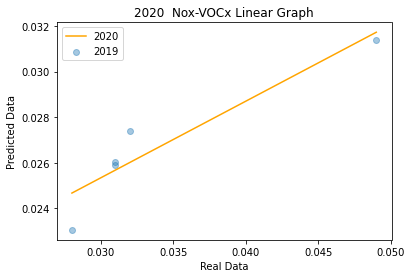

In [10]:
# 선형회귀의 결과를 시각화 그래프로 표현
# X축은 실제 데이터, Y축은 선형회귀로 예측한 데이터이다.
# 두 결과가 같다면 한 줄의 선으로 그려진다.

import matplotlib.pyplot as plt

#  우리가 위에서 나눴던 데이터는 고차원 행렬이므도 2차원 그래프에 표현하려면 좌표가 필요함.
#  때문에 n차원 행렬을 1차원 행렬(Vector)로 표현해야함. 
# flat이 붙은 애들은 각각 오존 실험데이터, 위에서 학습된 선형회귀 모델이  가지고  있는  예측 데이터를 1차원으로  바꾼 변수다.

flat_test = np.ravel(y_test)
flat_predict = np.ravel(y_predict)


# fit_line은 flat_test, flat_predict를 1차원으로 만드는 과정. np.polyfit이 그걸  가능하게 하는 함수다.
fit_line = np.polyfit(flat_test, flat_predict, 1)
x_minmax = np.array([min(flat_test), max(flat_test)]) # x축(flat_test) 최소값, 최대값
fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값


####
#flat_test1 = np.ravel(y1_test)
#flat_predict1 = np.ravel(y1_predict)
#fit_line1 = np.polyfit(flat_test1, flat_predict1, 1)
#x_minmax1 = np.array([min(flat_test1), max(flat_test1)]) # x축 최소값, 최대값
#fit_y1 = x_minmax1 * fit_line1[0] + fit_line1[1] # x축 최소, 최대값을 회귀식에 대입한 값


#plt.scatter(y1_test, y1_predict, alpha=0.4)
#plt.plot(x_minmax1, fit_y1, color = 'blue')


plt.scatter(y_test, y_predict, alpha=0.4)   # 주어진 1차원 좌표로 산점도를 그린다.
plt.plot(x_minmax, fit_y, color = 'orange') # 방금 계산했던  x축의 최대 최소값과 그걸 회귀식에 대입한 값을 이용해  선을 그린다.
plt.xlabel("Real Data")                     # x축은 실제 측정되어 제공되는 데이터
plt.ylabel("Predicted Data")                # y축은 선형회귀모델이 학습된걸 바탕으로 Nox,Vocs의  어떤 값이 주어지면 O3는 어떨 것이다를 계산한 값. 만약 실제데이터와 차이가 많다면 엉망진창인 그래프가  나온다.
plt.title("2020  Nox-VOCx Linear Graph")
plt.show()

In [11]:
import statsmodels.api as sm
results = sm.OLS(y_predict, sm.add_constant(y_test)).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     19.88
Date:                Tue, 24 May 2022   Prob (F-statistic):             0.0210
Time:                        09:24:56   Log-Likelihood:                 27.539
No. Observations:                   5   AIC:                            -51.08
Df Residuals:                       3   BIC:                            -51.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0153      0.003      5.787      0.010       0.007       0.024
O3             0.3359      0.075      4.459      0.021       0.096       0.576
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.431
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.208
Skew:                          -0.336   Prob(JB):                        0.901
Kurtosis:                       2.260   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""